### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** U

# **TAREA 1**

## Parte 1 - Clustering

In [1221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [1245]:
df = pd.read_excel('C:/Users/Elda/OneDrive/Data Science/3 Trimestre/Statistical Learning II/estaturas.xlsx', sheet_name='normales')

val = pd.read_excel('C:/Users/Elda/OneDrive/Data Science/3 Trimestre/Statistical Learning II/estaturas.xlsx', sheet_name='valtest(normales)')

test = pd.read_excel('C:/Users/Elda/OneDrive/Data Science/3 Trimestre/Statistical Learning II/estaturas.xlsx', sheet_name='anomalias')

In [1246]:
test

,Estatura,Edad
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


### Graficando Datos

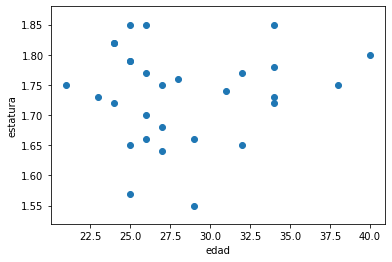

In [796]:
estatura = df.iloc[:,0]
edad = df.iloc[:,1]

plt.scatter(edad,estatura)
plt.xlabel('edad')
plt.ylabel('estatura')
plt.show()

### Funcion K-means

In [1055]:
def k_modes (k, df, it):
    
    random1 = random.sample(range(0,len(df)), k)


    # Paso 1 - Centroides iniciales
    centroides = np.array(())
    a = np.array(df.iloc[random1[0]]) # al azar del dataset
    centroides = a
    for j in range(1, k):
        b = np.array(df.iloc[random1[j]])
        centroides = np.append(centroides,b, axis = 0)
    centroides = centroides.reshape(k,2)

    print('Centroide Inicial:', centroides)
    plt.scatter(edad,estatura)
    plt.scatter(centroides[:,1],centroides[:,0], marker='D')
    plt.legend(('Datos','Centroide Inicial'))
    plt.xlabel('edad')
    plt.ylabel('estatura')
    plt.title('Inicializacion')
    plt.show()


    for i in range(it):
        lista = list()
        # Paso 2 - Distancias Euclidianas
        a = np.power(np.sum(np.power(centroides[0,:] - np.array(df),2), axis = 1),0.5).reshape(-1,1)
        distancias = a
        for j in range(1, k):
            b = np.power(np.sum(np.power(centroides[j,:] - np.array(df),2), axis = 1),0.5).reshape(-1,1)
            distancias = np.append(distancias,b, axis = 1)
        asignacion = np.argmin(distancias, axis = 1)

        # Paso 3 - Moviendo el Centroide
        suma = np.array(())
        for j in range(k):
            centroides[j] = np.mean(np.array(df)[asignacion == j],axis = 0)

        # Funcion de Costo - Funcion de Distorsion
            cluster = np.array(df)[asignacion == j]
            arg = (np.sum(np.sum(np.power(centroides[j] - cluster,2), axis = 1)))
            suma = np.append(suma, arg)
            
            lista.append(cluster)
            matrizCluster = lista

        costo = np.sum(suma) / len(df)

        print('ITERACION', i)
        print('Costo:',costo)
    print('Centroides Finales:',centroides)
    
    plt.scatter(df.iloc[:,1], df.iloc[:,0], c=asignacion, s=50,cmap='rainbow')
    plt.scatter(centroides[:,1], centroides[:,0], color='black')
    plt.xlabel('edad')
    plt.ylabel('estatura')
    plt.title('Clusters Final')
    plt.show()

    return (matrizCluster, centroides, asignacion)

#### Experimentos K = 2

Centroide Inicial: [[ 1.72 34.  ]
 [ 1.74 31.  ]]


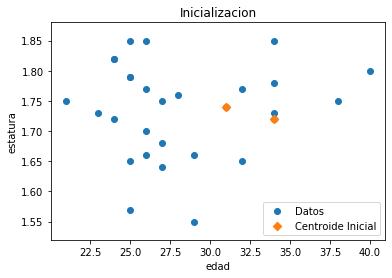

ITERACION 0
Costo: 7.0680086706646685
ITERACION 1
Costo: 5.3874934934318555
ITERACION 2
Costo: 4.860893697318008
ITERACION 3
Costo: 4.860893697318008
ITERACION 4
Costo: 4.860893697318008
Centroides Finales: [[ 1.75444444 34.33333333]
 [ 1.7255     25.6       ]]


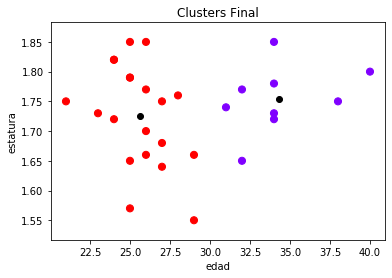

In [1056]:
m, c, _ = k_modes (2, df, 5)

#### Experimentos K = 3

Centroide Inicial: [[ 1.77 32.  ]
 [ 1.73 34.  ]
 [ 1.72 24.  ]]


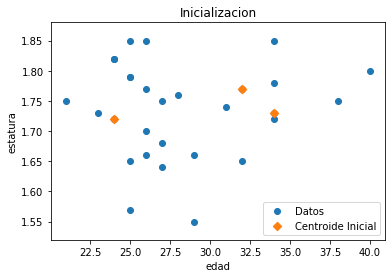

ITERACION 0
Costo: 3.0778522650439486
ITERACION 1
Costo: 3.0778522650439486
ITERACION 2
Costo: 3.0778522650439486
ITERACION 3
Costo: 3.0778522650439486
ITERACION 4
Costo: 3.0778522650439486
Centroides Finales: [[ 1.68833333 30.16666667]
 [ 1.77166667 35.66666667]
 [ 1.73764706 25.05882353]]


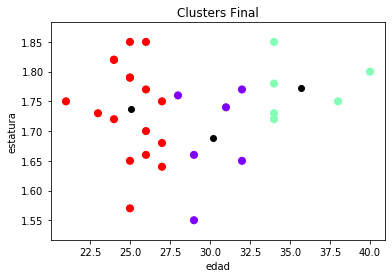

In [1047]:
m, c, _ = k_modes (3, df, 5)

#### Experimentos K = 4

Centroide Inicial: [[ 1.73 23.  ]
 [ 1.8  40.  ]
 [ 1.66 29.  ]
 [ 1.64 27.  ]]


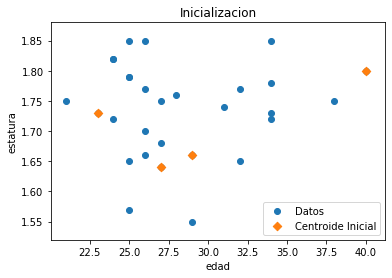

ITERACION 0
Costo: 2.4137109099616856
ITERACION 1
Costo: 1.9257810226937815
ITERACION 2
Costo: 1.6052685878489326
ITERACION 3
Costo: 1.6052685878489326
ITERACION 4
Costo: 1.6052685878489326
ITERACION 5
Costo: 1.6052685878489326
ITERACION 6
Costo: 1.6052685878489326
ITERACION 7
Costo: 1.6052685878489326
Centroides Finales: [[ 1.768      23.2       ]
 [ 1.775      39.        ]
 [ 1.74857143 33.        ]
 [ 1.71133333 26.4       ]]


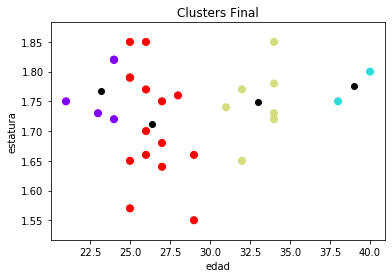

In [1048]:
m, c, _ = k_modes (4, df, 8)

#### Experimentos K = 5

Centroide Inicial: [[ 1.76 28.  ]
 [ 1.82 24.  ]
 [ 1.77 32.  ]
 [ 1.55 29.  ]
 [ 1.73 23.  ]]


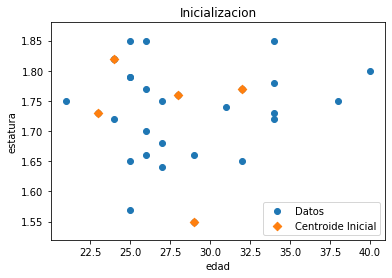

ITERACION 0
Costo: 2.6588427750410517
ITERACION 1
Costo: 2.275521428571429
ITERACION 2
Costo: 2.1856885344827583
ITERACION 3
Costo: 1.8077590229885059
ITERACION 4
Costo: 1.8077590229885059
ITERACION 5
Costo: 1.8077590229885059
ITERACION 6
Costo: 1.8077590229885059
ITERACION 7
Costo: 1.8077590229885059
Centroides Finales: [[ 1.72625    26.625     ]
 [ 1.75125    24.625     ]
 [ 1.77166667 35.66666667]
 [ 1.674      30.6       ]
 [ 1.74       22.        ]]


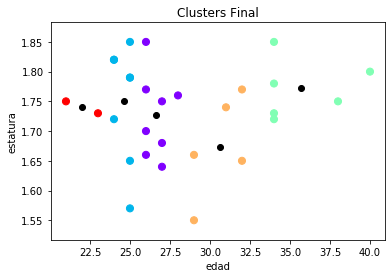

In [1049]:
m, c, _ = k_modes (5, df, 8)

#### Experimentos K = 6

Centroide Inicial: [[ 1.7  26.  ]
 [ 1.85 26.  ]
 [ 1.66 29.  ]
 [ 1.66 26.  ]
 [ 1.75 38.  ]
 [ 1.65 32.  ]]


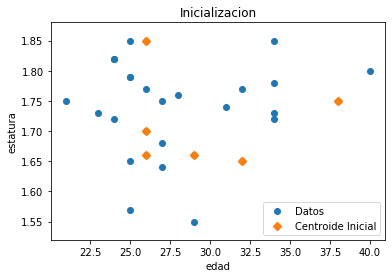

ITERACION 0
Costo: 1.695435550082102
ITERACION 1
Costo: 0.8279284072249591
ITERACION 2
Costo: 0.7352524302134648
ITERACION 3
Costo: 0.7352524302134648
ITERACION 4
Costo: 0.7352524302134648
ITERACION 5
Costo: 0.7352524302134648
ITERACION 6
Costo: 0.7352524302134648
ITERACION 7
Costo: 0.7352524302134648
Centroides Finales: [[ 1.73       25.        ]
 [ 1.768      23.2       ]
 [ 1.65666667 28.66666667]
 [ 1.72142857 26.42857143]
 [ 1.775      39.        ]
 [ 1.74857143 33.        ]]


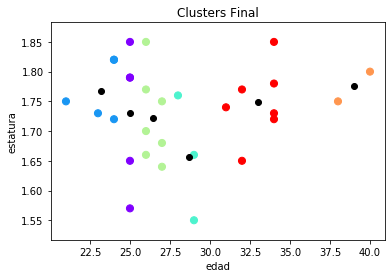

In [1059]:
m, c, _ = k_modes (6, df, 8)

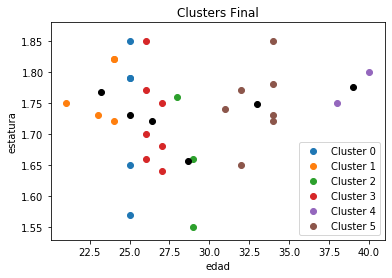

In [1060]:
#Grafico Clusters

plt.scatter(m[0][:,1], m[0][:,0])
plt.scatter(m[1][:,1], m[1][:,0])
plt.scatter(m[2][:,1], m[2][:,0])
plt.scatter(m[3][:,1], m[3][:,0])
plt.scatter(m[4][:,1], m[4][:,0])
plt.scatter(m[5][:,1], m[5][:,0])
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'))
plt.scatter(c[0,1], c[0,0], color='black')
plt.scatter(c[1,1], c[1,0], color='black')
plt.scatter(c[2,1], c[2,0], color='black')
plt.scatter(c[3,1], c[3,0], color='black')
plt.scatter(c[4,1], c[4,0], color='black')
plt.scatter(c[5,1], c[5,0], color='black')
plt.xlabel('edad')
plt.ylabel('estatura')
plt.title('Clusters Final')
plt.show()

#### Funcion Predict K-means

In [1094]:
def predict_cluster(k, df, it, predict):
    
    m, c, aa = k_modes(k, df, it)
    
    distancias = np.array(())
    a = np.power(np.sum(np.power(c[0,:] - np.array(predict),2), axis = 1),0.5).reshape(-1,1)
    distancias = a
    for j in range(1, k):
        b = np.power(np.sum(np.power(c[j,:] - np.array(predict),2), axis = 1),0.5).reshape(-1,1)
        distancias = np.append(distancias,b, axis = 1)
    asignacion = np.argmin(distancias, axis = 1)
    
    plt.scatter(df.iloc[:,1], df.iloc[:,0], c=aa, s=30,cmap='rainbow')
    plt.scatter(predict.iloc[:,1], predict.iloc[:,0], c=asignacion, s=50, cmap='rainbow', marker = 'P')
    plt.scatter(c[:,1], c[:,0], color='black')
    plt.xlabel('edad')
    plt.ylabel('estatura')
    plt.title('Prediccion')
    plt.show()
    
    print('Prediccion:')
    return(asignacion)


Centroide Inicial: [[ 1.75 21.  ]
 [ 1.57 25.  ]]


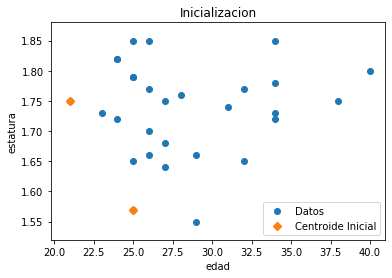

ITERACION 0
Costo: 18.235783397190293
ITERACION 1
Costo: 11.855335952813068
ITERACION 2
Costo: 6.207881000676132
ITERACION 3
Costo: 5.580233159177987
ITERACION 4
Costo: 4.860893697318008
ITERACION 5
Costo: 4.860893697318008
ITERACION 6
Costo: 4.860893697318008
ITERACION 7
Costo: 4.860893697318008
Centroides Finales: [[ 1.7255     25.6       ]
 [ 1.75444444 34.33333333]]


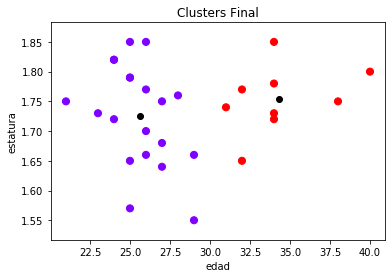

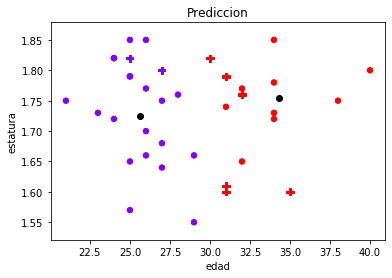

Prediccion:


array([0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [1095]:
predict_cluster(2, df, 8, val)

### Modelo Soft-Clustering GMM

In [1175]:
def cluster_GMM (k, df, predict):

    g = GaussianMixture(n_components=k).fit(df)
    prediccion = g.predict(df)
    probabilidad = g.predict_proba(df).round(3)
    
    # Prediccion Nuevos datos
    pred = g.predict(predict)

    # Grafico
    plt.scatter(df.iloc[:,1], df.iloc[:,0], c=prediccion, s=25, cmap='viridis')
    plt.scatter(predict.iloc[:,1], predict.iloc[:,0], c=pred, s=70, cmap='viridis', marker = '+')
    plt.xlabel('edad')
    plt.ylabel('estatura')
    plt.title('Clustering y Prediccion (+)')
    plt.show()
    
    print('Clusters:', prediccion)
    print('Probabilidad:', probabilidad)
    
    print('Prediccion')
    return (pred)

#### Experimento K = 2

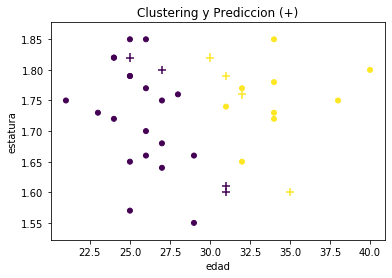

Clusters: [0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0]
Probabilidad: [[0.995 0.005]
 [0.023 0.977]
 [0.998 0.002]
 [0.    1.   ]
 [0.036 0.964]
 [0.749 0.251]
 [0.972 0.028]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.999 0.001]
 [0.999 0.001]
 [1.    0.   ]
 [0.992 0.008]
 [0.999 0.001]
 [0.    1.   ]
 [0.986 0.014]
 [0.996 0.004]
 [0.985 0.015]
 [0.971 0.029]
 [0.001 0.999]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.993 0.007]
 [0.884 0.116]
 [0.961 0.039]]
Prediccion


array([0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [1176]:
cluster_GMM (2, df, val)

#### Experimento K = 3

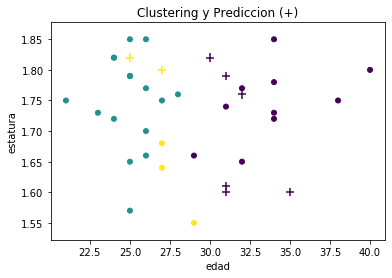

Clusters: [1 0 1 0 0 0 2 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 2 1 2]
Probabilidad: [[0.007 0.679 0.314]
 [0.996 0.004 0.   ]
 [0.004 0.991 0.005]
 [1.    0.    0.   ]
 [0.999 0.001 0.   ]
 [0.447 0.2   0.353]
 [0.053 0.441 0.505]
 [1.    0.    0.   ]
 [0.    0.826 0.173]
 [0.    1.    0.   ]
 [0.002 0.998 0.   ]
 [0.001 0.802 0.197]
 [0.    0.901 0.099]
 [0.021 0.969 0.01 ]
 [0.001 0.802 0.197]
 [1.    0.    0.   ]
 [0.026 0.715 0.259]
 [0.014 0.986 0.   ]
 [0.038 0.793 0.169]
 [0.041 0.608 0.351]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.748 0.252]
 [0.    0.901 0.099]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.006 0.039 0.956]
 [0.211 0.667 0.122]
 [0.06  0.438 0.502]]
Prediccion


array([1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1177]:
cluster_GMM (3, df, val)

#### Experimento K = 4

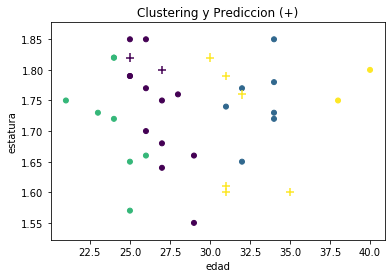

Clusters: [0 1 2 1 1 0 0 1 0 2 2 0 2 2 0 1 0 2 2 0 1 3 0 2 3 1 0 0 0]
Probabilidad: [[0.691 0.    0.309 0.   ]
 [0.    0.998 0.002 0.   ]
 [0.043 0.    0.957 0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.999 0.    0.   ]
 [0.888 0.015 0.097 0.   ]
 [0.69  0.    0.31  0.   ]
 [0.    1.    0.    0.   ]
 [0.712 0.    0.288 0.   ]
 [0.    0.    1.    0.   ]
 [0.005 0.    0.995 0.   ]
 [0.546 0.    0.454 0.   ]
 [0.393 0.    0.607 0.   ]
 [0.053 0.    0.947 0.   ]
 [0.546 0.    0.454 0.   ]
 [0.    1.    0.    0.   ]
 [0.531 0.    0.469 0.   ]
 [0.004 0.    0.996 0.   ]
 [0.374 0.    0.626 0.   ]
 [0.772 0.    0.228 0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.694 0.    0.306 0.   ]
 [0.393 0.    0.607 0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.949 0.002 0.049 0.   ]
 [0.741 0.    0.259 0.   ]
 [0.752 0.    0.248 0.   ]]
Prediccion


array([0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [1178]:
cluster_GMM (4, df, val)

#### Experimento K = 5

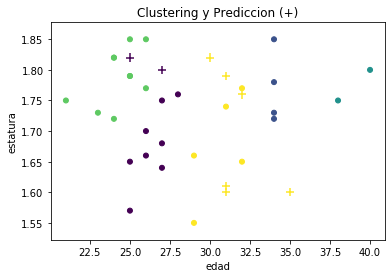

Clusters: [3 4 3 1 4 4 0 1 3 3 3 3 3 0 3 1 0 0 0 0 4 2 3 3 2 1 4 0 0]
Probabilidad: [[0.092 0.    0.    0.908 0.   ]
 [0.    0.    0.    0.    1.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.   ]
 [0.001 0.    0.    0.    0.999]
 [0.99  0.    0.    0.    0.01 ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.999 0.    0.    0.001 0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.992 0.    0.    0.008 0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.963 0.    0.    0.037 0.   ]
 [0.    0.    0.    0.    1.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.   ]
 [0.989 0.    0.    0.01 

array([3, 3, 4, 4, 4, 4, 4, 4], dtype=int64)

In [1179]:
cluster_GMM (5, df, val)

#### Experimento K = 6

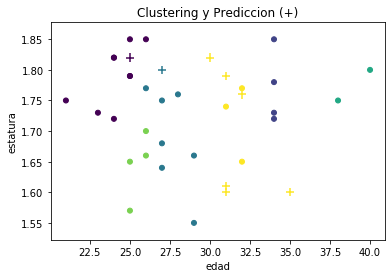

Clusters: [2 5 0 1 5 2 2 1 0 0 0 0 0 4 0 1 4 4 4 2 5 3 0 0 3 1 2 2 2]
Probabilidad: [[0.314 0.    0.604 0.    0.082 0.   ]
 [0.    0.    0.    0.    0.    1.   ]
 [0.993 0.    0.007 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.   ]
 [0.803 0.    0.197 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.913 0.    0.087 0.    0.    0.   ]
 [0.987 0.    0.013 0.    0.    0.   ]
 [0.    0.    0.011 0.    0.989 0.   ]
 [0.913 0.    0.087 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.   ]
 [0.002 0.    0.241 0.    0.757 0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.144 0.    0.856 0.   ]
 [0.012 0.    0.956 0.    0.032 0.   ]
 [0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.895 0.    0.105 0.    0.    0.   ]
 [0.987 0.    0.013

array([0, 2, 5, 5, 5, 5, 5, 5], dtype=int64)

In [1180]:
cluster_GMM (6, df, val)

### Método del Codo

El método del codo podría utilizarse como una alternativa a este caso bajo estudio para seleccionar el valor de k al comparar el valor de la función costo distorsión que se desea minimizar con la cantidad de clusters, de una forma un poco más automatizada.

Empíricamente se realizaron varios experimentos tanto con el método de k-means como GMM y se pudo observar que el mejor un número ideal de clusters para el dataset bajo análisis es 2 o posiblemente 3. Arriba de esto los datos ya no se ajustan tan bien a los cluster como se puede observar en los gráficos y en las distribuciones de probabilidad de GMM.

En este caso al ser un dataset pequeño y de solo 2 features es fácil hacerlo con experimentación; sin embargo, en casos más complejos puede resultar útil al menos como punto de partida utilizar el método del codo para estimar la cantidad de cluster a elegir.

Concluyendo el método del codo podría aplicarse a este problema.

## Parte 2 - Detección de Anomalías

### Distribucion Gaussiana Multivariada

In [1267]:
def mult_gauss (df, validation_set):
    # Medias
    mu = np.mean(np.array(df),axis=0)

    # Matriz Covarianza
    sigma = np.cov(np.array(df).T)

    # Distribucion Multivariada
    p = multivariate_normal(mean = mu, cov = sigma)
    PDF = p.pdf(df)
    
    
    # Select Epsilon
    PDF2 = p.pdf(validation_set)
    bestEpsilon = 0
    bestF1 = 0
    f = 0
    step = (np.max(PDF2) - np.min(PDF2)) / 100
    epsilons = np.arange(np.min(PDF2), np.max(PDF2), step)

    for epsilon in epsilons:
        prediction = PDF2 < epsilon
        f = f1_score(np.ones(len(val)), prediction, average = "binary")

        if f > bestF1:
            bestF1 = f
            bestEpsilon = epsilon

    return (p, bestEpsilon, bestF1)

In [1271]:
mult_gauss (df, val)

(<scipy.stats._multivariate.multivariate_normal_frozen at 0x1d83db6a988>,
 0.2971072891071003,
 0.9333333333333333)

In [1283]:
def funcion_predict_mult_gauss (df, validation_set, test_set):
    
    p, epsilon, F1 = mult_gauss (df, validation_set)
    
    PDF3 = p.pdf(test_set)
    prediction = PDF3 < epsilon
    
    #Grafico
    plt.scatter(df.iloc[:,1], df.iloc[:,0], color = 'green')
    plt.scatter(test_set.iloc[:,1], test_set.iloc[:,0], color = 'red')
    plt.xlabel('edad')
    plt.ylabel('estatura')
    plt.show()
    
    print('Prediccion:')
    return (prediction)

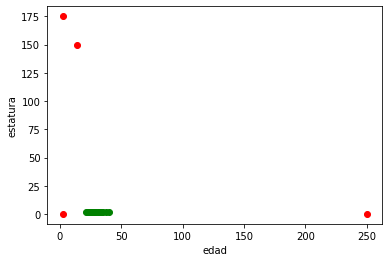

Prediccion:


array([ True,  True,  True,  True])

In [1284]:
funcion_predict_mult_gauss (df, val, test)

Centroides: [ 1.77 29.  ] [ 1.65 26.  ] [ 1.65 31.  ]


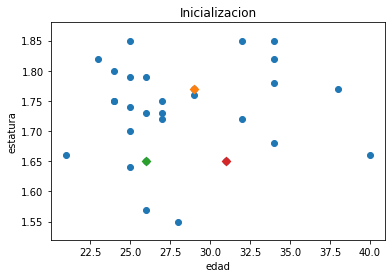

ITERACION 0
Costo: 3.716226098715348
Centroides: [ 1.69333333 28.66666667] [ 1.73176471 25.05882353] [ 1.75333333 34.33333333]
ITERACION 1
Costo: 3.251703017241379
Centroides: [ 1.70428571 28.28571429] [ 1.73142857 24.64285714] [ 1.76625 34.75   ]
ITERACION 2
Costo: 3.251703017241379
Centroides: [ 1.70428571 28.28571429] [ 1.73142857 24.64285714] [ 1.76625 34.75   ]
ITERACION 3
Costo: 3.251703017241379
Centroides: [ 1.70428571 28.28571429] [ 1.73142857 24.64285714] [ 1.76625 34.75   ]
ITERACION 4
Costo: 3.251703017241379
Centroides: [ 1.70428571 28.28571429] [ 1.73142857 24.64285714] [ 1.76625 34.75   ]


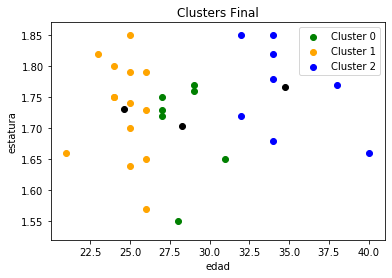

In [272]:


print('Centroides:',centroide0, centroide1, centroide2)
plt.scatter(edad,estatura)
plt.scatter(centroide0[1],centroide0[0],marker='D')
plt.scatter(centroide1[1],centroide1[0],marker='D')
plt.scatter(centroide2[1],centroide2[0],marker='D')
plt.xlabel('edad')
plt.ylabel('estatura')
plt.title('Inicializacion')
plt.show()



for i in range(5):
    for j in range(k):
        # Paso 2 - Distancias Euclidianas a los Centroides
        
        centroide0 = np.array(df.iloc[random1[0]])
        centroide1 = np.array(df.iloc[random1[1]])
        centroide2 = np.array(df.iloc[random1[2]])

        dist0 = np.power(np.sum(np.power(centroide0 - np.array(df),2), axis = 1),0.5).reshape(-1,1)
        dist1 = np.power(np.sum(np.power(centroide1 - np.array(df),2), axis = 1),0.5).reshape(-1,1)
        dist2 = np.power(np.sum(np.power(centroide2 - np.array(df),2), axis = 1),0.5).reshape(-1,1)

    asignacion = np.argmin(np.concatenate((dist0,dist1,dist2), axis = 1), axis = 1)

    cluster0 = np.array(df)[asignacion == 0]
    cluster1 = np.array(df)[asignacion == 1]
    cluster2 = np.array(df)[asignacion == 2]


    # Paso 3 - Moviendo el Centroide

    centroide0 = np.mean(cluster0, axis = 0)
    centroide1 = np.mean(cluster1, axis = 0)
    centroide2 = np.mean(cluster2, axis = 0)

    # Funcion de Costo - Funcion de Distorsion

    costo = (np.sum(np.sum(np.power(centroide0 - cluster0,2), axis = 1).reshape(-1,1)) + np.sum(np.sum(np.power(centroide1 - cluster1,2), axis = 1).reshape(-1,1)) + np.sum(np.sum(np.power(centroide2 - cluster2,2), axis = 1).reshape(-1,1))) / len(df)
    print('ITERACION', i)
    print('Costo:',costo)
    print('Centroides:',centroide0, centroide1, centroide2)
    
plt.scatter(cluster0[:,1],cluster0[:,0], color = 'green')
plt.scatter(cluster1[:,1],cluster1[:,0], color = 'orange')
plt.scatter(cluster2[:,1],cluster2[:,0], color = 'blue')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'))
plt.scatter(centroide0[1],centroide0[0],color='black')
plt.scatter(centroide1[1],centroide1[0],color='black')
plt.scatter(centroide2[1],centroide2[0],color='black')
plt.xlabel('edad')
plt.ylabel('estatura')
plt.title('Clusters Final')
plt.show()